In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.metrics import confusion_matrix

import itertools

In [2]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline



# Read the Data

In [3]:
data = pd.read_csv('../input/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
492/284807    #Indicates that our target variable is highly imbalanced

0.001727485630620034

To handle the imbalance, we could use the oversampling principle or the undersampling principle.
The undersampling principle should be used only if we can be sure that the selected subset (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset.

# Data Visualization

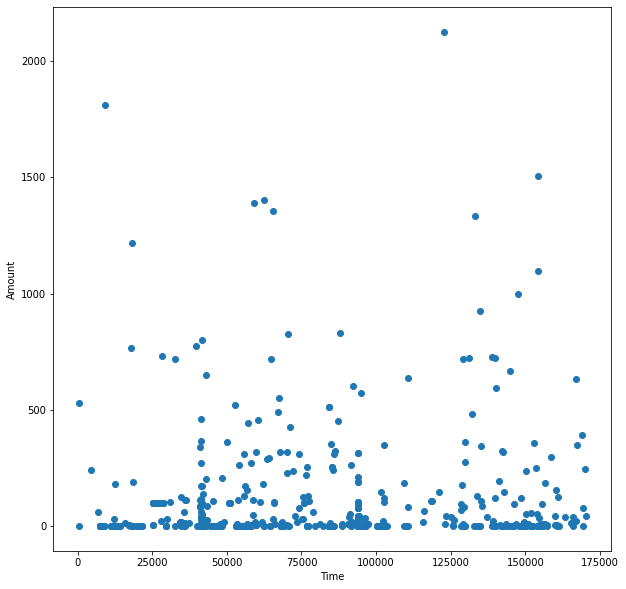

In [10]:
df_fraud = data[data.Class==1]
plt.figure(figsize = (10,10))
plt.scatter(df_fraud.Time, df_fraud.Amount)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

We notice that time doesn't impact the frequency of frauds and majority of frauds are of small amounts.

# Correlation of features

In [11]:
corr = data.corr()

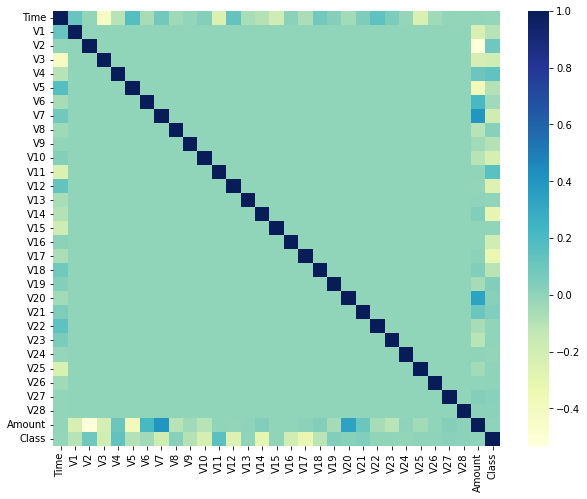

In [12]:
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

As we can notice, most of the features are not correlated with each other. This corroborates the fact that a PCA might have been previously performed on the data.

# Data Selection

OVERSAMPLING:

One way to do oversampling is to replicate the under-represented class until we attain a correct proportion between the classes. But since the data is huge, it would take a lot of time and resources to train, we'll go with undersampling.

### UNDERSAMPLING

In [13]:
150000/284807

0.5266724483597665

In [14]:
# Separate our entire data into two groups - Train and Test

# Train Dataset
df_train = data[0:150000]
df_train_1 = df_train[df_train.Class==1] # Fraud Dataset
df_train_0 = df_train[df_train.Class == 0] #Non-Fraud Dataset

print("Fraud:", df_train_1.shape[0])
print("Non-Fraud:", df_train_0.shape[0])

Fraud: 293
Non-Fraud: 149707


In [15]:
df_sample = df_train_0.sample(300, random_state = 0) # Random sampling of non-fraud dataset
df_train = df_train_1.append(df_sample) # Joined both the datasets
df_train = df_train.sample(frac=1) # Mix the dataset
df_train.shape

(593, 31)

In [16]:
X_train = df_train.drop(['Time', 'Class'], axis = 1) # Drop Time(not useful) and Class(traget variable)
y_train = df_train['Class']
X_train = np.array(X_train)
y_train = np.array(y_train)
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
df_test = data[150000:]

X_test = df_test.drop(['Time', 'Class'], axis=1)
y_test = df_test['Class']
X_test = np.array(X_test)
y_test = np.array(y_test)
print(type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [18]:
# No. of samples in our train and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((593, 29), (593,), (134807, 29), (134807,))

# Confusion Matrix

In [19]:
classes = np.array(['0', '1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)
classes

array(['0', '1'], dtype='<U1')

In [20]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Selection

So now, we'll use a SVM model classifier, with the scikit-learn library.

In [21]:
svm_classifier = svm.SVC(kernel = 'linear') # Create an instance for SVM Classifier

In [22]:
svm_classifier.fit(X_train, y_train) # Then we fit our train data to the clssifier

SVC(kernel='linear')

# Testing the Model

In [23]:
y_predict = svm_classifier.predict(X_test) # Predict on test data using our trained model
len(y_predict) 

134807

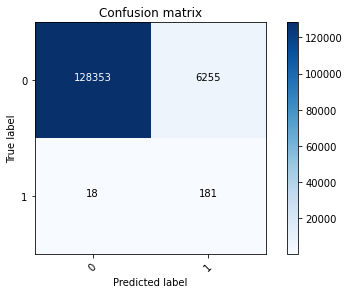

In [24]:
cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm,classes)

We are trying to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix.  But more importantly, being wrong about an actual fraud is far worse than being wrong about a non-fraud transaction. 

That is why  using the accuracy as only classification criterion could be considered unthoughtful. 
During the remaining part of this study, we'll give the precision 4 times more importance than the general accuracy.
Even though the final criterion will be accuracy only.

In [25]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9183315525754612


In [26]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 181 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9095477386934674
the accuracy is : 0.9534668081034368


# Re-balanced class weight :

In the previously used SVM model, the weight of each class was the same, which means that missing a fraud is as bad as misjudging a non-fraud. The objective, for a bank, is to maximize the number of detected frauds! Even if it means considering more non-fraud tuple as fraudulent transactions. So, we need to minimize the False Negatives : the number of no detected frauds.

Indeed, by modifying the class_weight parameter, we can chose which class to give more importance during the training phase. In this case, the class_1 which describes the fraudulent operations will be considered more important than the class_0 (non-fraud operation). However, in this case we will give more importance to the class_0 due to the large number of misclassed non-fraud operation. Of course the goal is to lose as little effective fraud as possible in the process.


In [27]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [28]:
classifier_b.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

# Testing the Model

In [29]:
prediction_SVM_b_all = classifier_b.predict(X_test) #We predict all the data set.

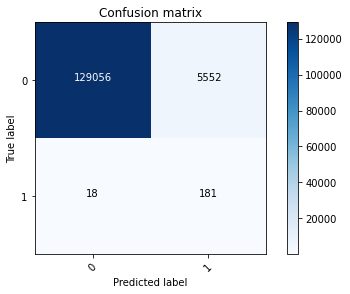

In [30]:
cm = confusion_matrix(y_test, prediction_SVM_b_all)
plot_confusion_matrix(cm,classes)

In [31]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9193745251213972


In [32]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 181 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9095477386934674
the accuracy is : 0.958681670833117
